# **Exploração e análise de dados de crédito com SQL**

**Os dados**:

Vamos trabalhar com uma tabela de dados que representam informações de clientes de um banco e contam com as seguintes colunas:

* **idade** = idade do cliente
* **sexo** = sexo do cliente (F ou M)
* **dependentes** = número de dependentes do cliente
* **escolaridade** = nível de escolaridade do clientes
* **salario_anual** = faixa salarial do cliente
* **tipo_cartao** = tipo de cartao do cliente
* **qtd_produtos** = quantidade de produtos comprados nos últimos 12 meses
* **iteracoes_12m** = quantidade de iterações/transacoes nos ultimos 12 meses
* **meses_inativo_12m** = quantidade de meses que o cliente ficou inativo
* **limite_credito** = limite de credito do cliente
* **valor_transacoes_12m** = valor das transações dos ultimos 12 meses
* **qtd_transacoes_12m** = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no **AWS Athena** junto com o **S3 Bucket** com uma versão dos dados disponibilizados em: https://github.com/andre-marcos-perez/ebac-course-utils/tree/main/dataset

# **Exploração de dados:**

A primeira fase da análise é entender o que tem na nossa matéria prima. Vamos então realizar a exploração de dados:

* Qual a quantidade de informações temos na nossa base de dados?

**Query: SELECT count(*) AS Quantidade_Linhas FROM credito**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/quantidade.PNG?raw=true)

*Resposta: 2564 linhas*

PS.: A base de dados do link acima contém mais linhas do que a seleção utilizada. Isso se deve ao fato de existirem limites computacionais e financeiros na qual a redução de dados para análise para fins de estudo, se torna mais interessante.

* Como são os dados(10 primeiras linhas):

**Query: SELECT * FROM credito LIMIT 10;**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/tabela.PNG?raw=true)

-- Valores nulos(na) serão tratados posteriormente.

* Quais os tipos de cada dado:

**Query: DESCRIBE credito**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/tipo_dados.PNG?raw=true)

Agora que já entendemos quais são os tipos de dados, vamos olhar mais atentamente para as varíaveis que não são numéricas.

* Quais são os tipos de escolaridade disponíveis no dataset?

**Query: SELECT DISTINCT escolaridade FROM credito**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/escolaridade.PNG?raw=true)

-- Valores nulos(na) serão tratados posteriormente.

* Tipos de estado_civil disponíveis no dataset:

**Query: SELECT DISTINCT estado_civil FROM credito**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/estadocivil.PNG?raw=true)

-- Valores nulos(na) serão tratados posteriormente.

* Quais são os tipos de salario_anual disponíveis no dataset?

Os dados tratam-se da faixa salarial anual dos clientes.

**Query: SELECT DISTINCT salario_anual FROM credito**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/salario.PNG?raw=true)

--Valores nulos(na) serão tratados posteriormente.

* Quais são os tipos de cartão disponíveis no dataset?

**Query: SELECT DISTINCT tipo_cartao FROM credito**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/tipocartao.PNG?raw=true)

# **Análise de dados**

Uma vez que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo.

* Nesse banco de dados, quantos clientes temos de cada faixa salarial?

**Query: select count(*), salario_anual from credito group by salario_anual**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/mediasalclientes.PNG?raw=true)

Dentre as faixas de renda que foram informadas, podemos ver uma concentração maior(701) em clientes que ganham menos de $40k ao ano, dessa forma, a instituição pode pensar em uma abordagem de negócios focada à esse público.

* Nesse banco de dados, quantos clientes são homens e quantos são mulheres?

**Query: select count(*), sexo from credito group by sexo**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/hommul.PNG?raw=true)

Vamos criar um gráfico para vizualizar melhor as informações sobre distribuição dos clientes em relação ao sexo. Para isso, utilizaremos códigos Python:

In [1]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Carregar o dataset com arquivo .csv estraído do SELECT do AWS Athena:
df = pd.read_csv('/kaggle/input/groupbusex/groupbysex.csv')

# Exemplo de análise exploratória: mesmos dados do AWS agora em Python
df.head()

,_col0,sexo
0,1001,F
1,1563,M


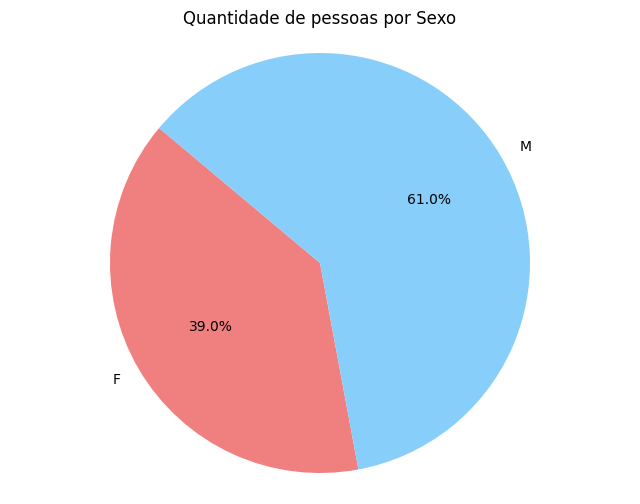

In [3]:
# Criar o DataFrame com os dados fornecidos
data = {
    '_col0': [1001, 1563],
    'sexo': ['F', 'M']
}
df = pd.DataFrame(data)

# Preparar os dados para o gráfico de pizza
valores = df['_col0']
categorias = df['sexo']
cores = ['lightcoral', 'lightskyblue']  # Cores para cada categoria ('F' para feminino, 'M' para masculino)

# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=categorias, colors=cores, autopct='%1.1f%%', startangle=140)
plt.title('Quantidade de pessoas por Sexo')
plt.axis('equal')  # Assegura que o gráfico de pizza é desenhado como um círculo.
plt.show()

É possível verificar, que a maioria dos clientes é homem.

* Vamos verificar qual a faixa etária desses clientes, para melhorar a estratégia de marketing.

**Query: select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexo**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/faixaetaria.PNG?raw=true)

Não foram retiradas informações relevantes desses dados, devido não ter sido encontrada nenhuma discrepância de idades entre homens e mulheres.

* Qual a maior e menor transação dos clientes?

**Query: select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from credito**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/maxmin.PNG?raw=true)

Nesse banco de dados vemos a soma de transações em 12 meses, que variam de 510.16 a 5776.58

* Quais as características dos clientes que possuem os maiores creditos?

**Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/limcred.PNG?raw=true)

Não parece haver um impacto da escolaridade no limite. O limite mais alto é oferecido para um homem sem educação formal. O cartão também parece não estar relacionado com a escolaridade nem com o limite. Dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

* Quais as características dos clientes que possuem os menores creditos?

**Query: select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/menlim.PNG?raw=true)

Dessa vez conseguimos perceber que não há clientes com cartão platinum dentre os menores limites. Também foi possível perceber que a maioria dos menores limites são mulheres enquanto nos maiores limites predomina homens.

* Será que as mulheres gastam mais?

**Query: select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/gastos.PNG?raw=true)

Apesar da diferença nos limites, os gastos de homens e mulheres são similares.

* O salário impacta no limite?

**Query: select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc**

![](https://github.com/vanessamo88/ProjetoSQL/blob/main/proporc.PNG?raw=true)

Nota-se que as pessoas que tem **menor** **faixa salarial** também apresentam **menor limite** de crédito.

In [4]:
# Carregar o dataset com arquivo .csv estraído do SELECT do AWS Athena:
df = pd.read_csv('/kaggle/input/faixasalarial1/faixasalarial.csv')

# Exemplo de análise exploratória: mesmos dados do AWS agora em Python
df.head(10)

,media_valor_transacoes,media_limite,sexo,salario_anual
0,1963.6719,3452.4036,M,menos que $40K
1,1878.2974,5753.3100,M,$40K - $60K
2,1845.1332,4212.1987,F,menos que $40K
3,1818.6364,9096.0280,M,$60K - $80K
4,1781.4299,4773.4463,F,$40K - $60K
5,1755.2499,14886.5560,M,$80K - $120K
6,1701.4652,17801.4880,M,$120K +


In [5]:
#Bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_18/1869851503.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['salario_anual'] = df['salario_anual'].replace({


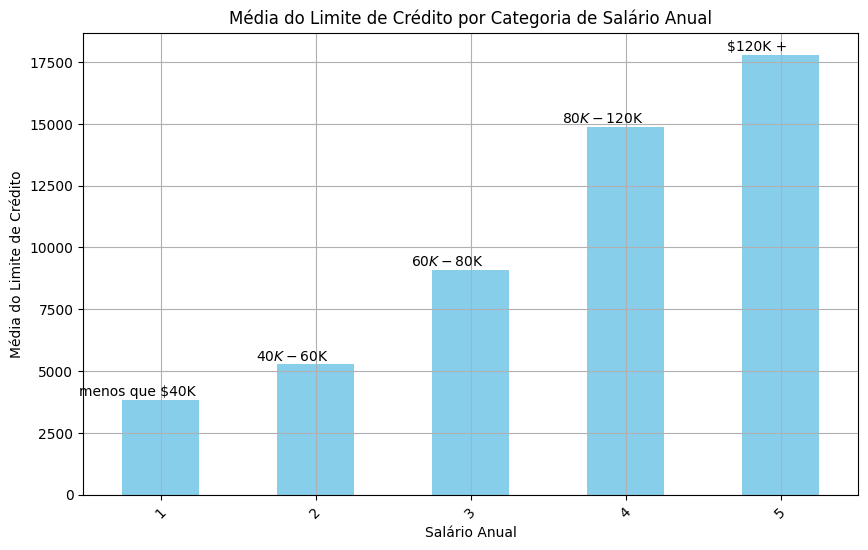

In [6]:
# Mapear categorias de salário anual para valores numéricos
df['salario_anual'] = df['salario_anual'].replace({
    'menos que $40K': 1,
    '$40K - $60K': 2,
    '$60K - $80K': 3,
    '$80K - $120K': 4,
    '$120K +': 5
})

# Agrupar por salário anual e calcular a média do limite de crédito
media_limite_por_salario = df.groupby('salario_anual')['media_limite'].mean()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
bars = media_limite_por_salario.plot(kind='bar', color='skyblue')
plt.xlabel('Salário Anual')
plt.ylabel('Média do Limite de Crédito')
plt.title('Média do Limite de Crédito por Categoria de Salário Anual')
plt.xticks(rotation=45)
plt.grid(True)

# Adicionar legenda
legenda = {
    1: 'menos que $40K',
    2: '$40K - $60K',
    3: '$60K - $80K',
    4: '$80K - $120K',
    5: '$120K +'
}

for bar, salario_anual in zip(bars.patches, media_limite_por_salario.index):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 50, legenda[salario_anual], ha='center', va='bottom')

plt.show()

Neste gráfico podemos ver perfeitamente a progressão do limite de crédito em relação à média salarial dos clientes.

# **Conclusão**

Essas foram algumas análises extraídas do dataset de crédito.

Alguns insights interessantes:

* a maior parte dos clientes possui renda até 40K
* a maior parte dos clientes é homem
* a escolaridade não parece influenciar no limite nem no tipo do cartão
* os clientes com maiores limites são em sua maioria homens
* os clientes com menores limites são em sua maioria mulheres
* dentre os menores limites não há presença de cartão platinum
* a faixa salarial impacta diretamente no limite de crédito
* não existem clientes com salário anual acima de 60K do sexo feminino
